# Target of Interest: Perseus
- 5 sq. deg. region centered on l=159.25, b=-19.85
- 50,000 stars; 25 healpix nside 128 pixels


# Logistics of Run:
- 200 walkers
- 6 velocity slices (1.3 km/s apart)
- 10,000 steps each
- 5 temperatures
- Ran both WITH and WITHOUT GALFA HI data

In [14]:
import emcee
from dustcurve import model
import seaborn as sns
import numpy as np
from dustcurve import pixclass
import matplotlib.pyplot as plt
import pandas as pd
import warnings
from dustcurve import io
from dustcurve import hputils
from dustcurve import kdist
from dustcurve import globalvars as gv
%matplotlib inline

import h5py
#Save the results of the sampler:
#our pixels of choice
file=h5py.File('/n/fink1/czucker/Output/Perseus_no_HI_Aug3_sig0.01_gr_25tiles_200walkers.h5')
chain_ensemble=file['/chains']

gv.setup("Perseus")


Globalvars setup complete


In [30]:
def gelman_rubin(chain_ensemble):
    """
    returns: Gelman-Rubin scale reduction factor for set of chains
    Parameters:
    chain_ensemble: the ensemble of chains to use; this paramater expects that the first nsteps/2 of each chain have already been discarded;
    chain_ensemble should be an array of the format nchains x nsteps x ndim
    
    for more info on GR diagnostic see: http://www.people.fas.harvard.edu/~plam/teaching/methods/convergence/convergence_print.pdf

    code adapted from function github.com/hmc/convergence.py available under GNU open source license
    """

    nruns,ndim,nsteps=chain_ensemble.shape

    B=nsteps*np.var(np.mean(chain_ensemble,axis=2),axis=0,ddof=1)

    W=np.mean(np.var(chain_ensemble,axis=2,ddof=1),axis=0)

    Vhat = W*(nsteps - 1)/nsteps + B/nsteps

    return np.sqrt(Vhat/W)

# Run with just CO (log-normal prior on coefficients, sigma=0.01)

Parameter: Run1  Run2  Run3  Run4 ; Gelman-Rubin Diagnostic
d1: 6.33 6.32 6.37 7.21  ; GR=2.32


d2: 15.13 14.66 15.05 14.95  ; GR=1.08


d3: 7.21 7.29 7.26 6.79  ; GR=1.10


d4: 14.13 14.29 14.22 14.16  ; GR=1.12


d5: 14.59 14.94 14.66 14.56  ; GR=1.08


d6: 7.35 7.44 7.39 7.28  ; GR=1.18


c_CO_1: 1.11 1.23 1.25 1.22 ; GR=1.25


c_CO_2: 1.09 1.04 1.11 1.12 ; GR=1.08


c_CO_3: 0.94 0.91 0.86 0.91 ; GR=1.21


c_CO_4: 1.11 1.06 1.12 1.12 ; GR=1.10


c_CO_5: 1.11 1.07 1.11 1.14 ; GR=1.10


c_CO_6: 0.94 0.94 0.94 0.92 ; GR=1.05




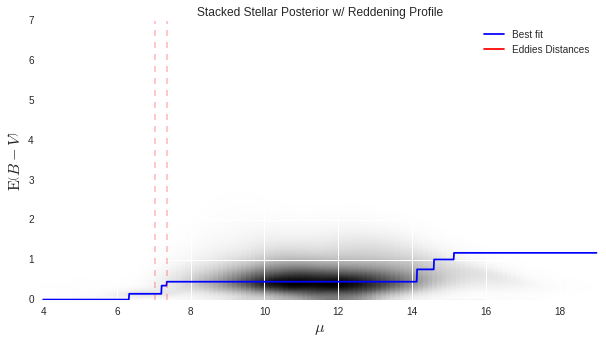

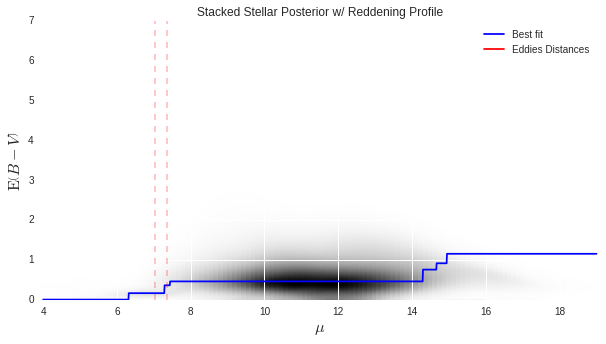

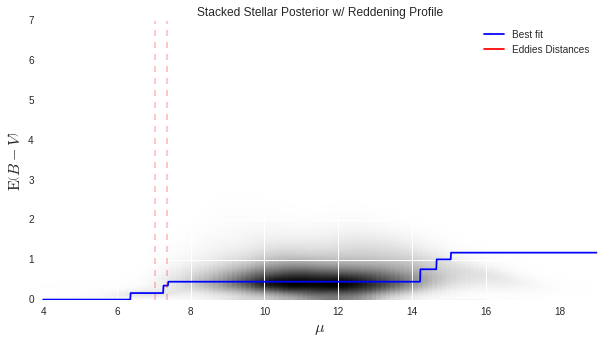

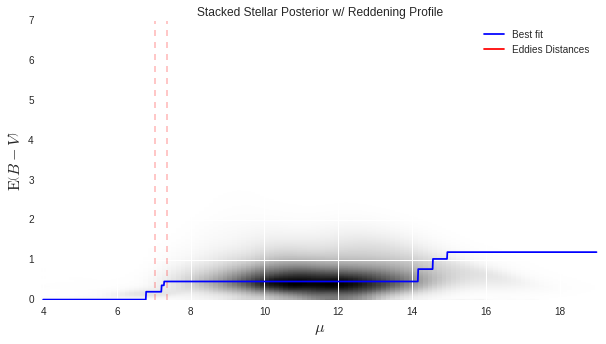

In [29]:
import importlib
from dustcurve import plot_posterior
importlib.reload(plot_posterior)

gr=gelman_rubin(chain_ensemble)

theta_0=pd.DataFrame(chain_ensemble[0,:,:])
quantile_50_0=theta_0.quantile(.50, axis=1).values
plot_posterior.plot_samples(quantile_50_0, theta_0, "Perseus", normcol=False)

theta_1=pd.DataFrame(chain_ensemble[1,:,:])
quantile_50_1=theta_1.quantile(.50, axis=1).values
plot_posterior.plot_samples(quantile_50_1, theta_1, "Perseus", normcol=False)

theta_2=pd.DataFrame(chain_ensemble[2,:,:])
quantile_50_2=theta_2.quantile(.50, axis=1).values
plot_posterior.plot_samples(quantile_50_2, theta_2, "Perseus", normcol=False)

theta_3=pd.DataFrame(chain_ensemble[3,:,:])
quantile_50_3=theta_3.quantile(.50, axis=1).values
plot_posterior.plot_samples(quantile_50_3, theta_3, "Perseus", normcol=False)

nslices=6
print("Parameter: Run1  Run2  Run3  Run4 ; Gelman-Rubin Diagnostic")

for i in range(0,nslices):
    print("d{:d}: {:.2f} {:.2f} {:.2f} {:.2f}  ; GR={:.2f}".format(i+1,quantile_50_0[i],quantile_50_1[i],quantile_50_2[i],quantile_50_3[i],gr[i]))
    print("\n")
    
#print out CO coefficients
for i in range(nslices,2*nslices):
    print("c_CO_{:d}: {:.2f} {:.2f} {:.2f} {:.2f} ; GR={:.2f}".format(i-5,quantile_50_0[i],quantile_50_1[i],quantile_50_2[i],quantile_50_3[i],gr[i]))
    print("\n")


### Verdict: One cloud at ~300 pc, another cloud at ~10 kpc ; near cloud consistent with Eddie's findings

# Run with both CO and HI (log-normal prior on coefficients, sigma=0.01)

In [31]:
file=h5py.File('/n/fink1/czucker/Output/Perseus_w_HI_July31_sig0.01_gr_25tiles_200walkers.h5')
chain_ensemble=file['/chains']

Parameter: Run1  Run2  Run3  Run4 ; Gelman-Rubin Diagnostic
d1: 7.25 7.37 5.87 7.08  ; GR=1.81


d2: 4.98 5.63 7.82 5.25  ; GR=1.19


d3: 15.36 7.46 7.17 7.99  ; GR=1.32


d4: 7.62 7.32 7.87 7.12  ; GR=1.04


d5: 14.77 15.25 15.61 15.07  ; GR=1.29


d6: 7.45 7.60 13.38 7.32  ; GR=1.15


c_CO_1: 0.56 0.53 0.57 0.57 ; GR=1.05


c_CO_2: 0.50 0.43 0.44 0.45 ; GR=1.02


c_CO_3: 0.91 0.39 0.45 0.55 ; GR=1.51


c_CO_4: 0.56 0.39 0.42 0.58 ; GR=1.05


c_CO_5: 0.85 1.10 1.04 1.26 ; GR=1.65


c_CO_6: 0.81 0.68 0.99 0.89 ; GR=1.24


c_HI_1: 1.97 1.60 1.87 1.90 ; GR=1.22


c_HI_2: 2.22 2.36 2.18 1.69 ; GR=1.23


c_HI_3: 1.14 1.94 2.05 2.19 ; GR=1.07


c_HI_4: 1.77 1.51 1.95 1.54 ; GR=1.06


c_HI_5: 0.99 1.00 1.00 1.21 ; GR=1.14


c_HI_6: 1.55 1.17 1.04 1.21 ; GR=1.37




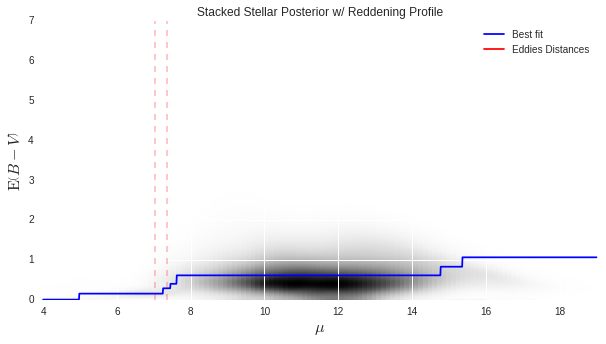

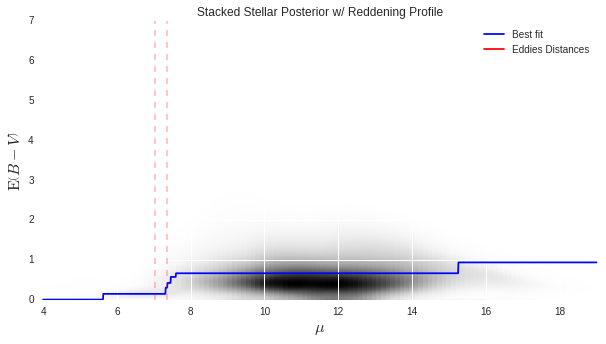

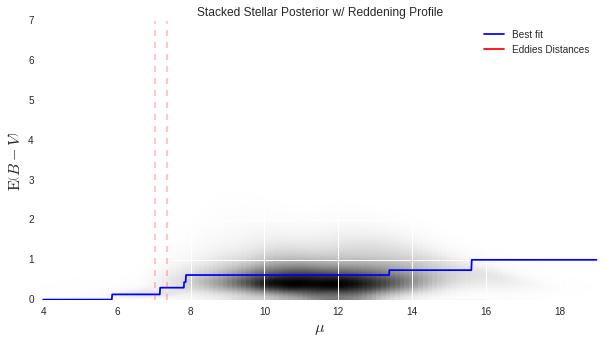

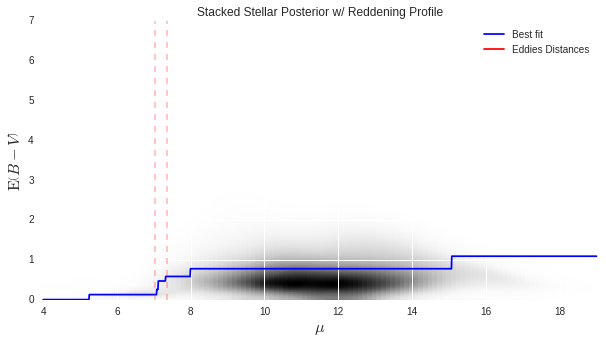

In [33]:
import importlib
from dustcurve import plot_posterior_HI
importlib.reload(plot_posterior_HI)

gr=gelman_rubin(chain_ensemble)

theta_0=pd.DataFrame(chain_ensemble[0,:,:])
quantile_50_0=theta_0.quantile(.50, axis=1).values
plot_posterior_HI.plot_samples(quantile_50_0, theta_0, "Perseus", normcol=False)

theta_1=pd.DataFrame(chain_ensemble[1,:,:])
quantile_50_1=theta_1.quantile(.50, axis=1).values
plot_posterior_HI.plot_samples(quantile_50_1, theta_1, "Perseus", normcol=False)

theta_2=pd.DataFrame(chain_ensemble[2,:,:])
quantile_50_2=theta_2.quantile(.50, axis=1).values
plot_posterior_HI.plot_samples(quantile_50_2, theta_2, "Perseus", normcol=False)

theta_3=pd.DataFrame(chain_ensemble[3,:,:])
quantile_50_3=theta_3.quantile(.50, axis=1).values
plot_posterior_HI.plot_samples(quantile_50_3, theta_3, "Perseus", normcol=False)

nslices=6
print("Parameter: Run1  Run2  Run3  Run4 ; Gelman-Rubin Diagnostic")

for i in range(0,nslices):
    print("d{:d}: {:.2f} {:.2f} {:.2f} {:.2f}  ; GR={:.2f}".format(i+1,quantile_50_0[i],quantile_50_1[i],quantile_50_2[i],quantile_50_3[i],gr[i]))
    print("\n")
    
#print out CO coefficients
for i in range(nslices,2*nslices):
    print("c_CO_{:d}: {:.2f} {:.2f} {:.2f} {:.2f} ; GR={:.2f}".format(i-5,quantile_50_0[i],quantile_50_1[i],quantile_50_2[i],quantile_50_3[i],gr[i]))
    print("\n")

#print out HI coefficients
for i in range(2*nslices,3*nslices):
    print("c_HI_{:d}: {:.2f} {:.2f} {:.2f} {:.2f} ; GR={:.2f}".format(i-11,quantile_50_0[i],quantile_50_1[i],quantile_50_2[i],quantile_50_3[i],gr[i]))
    print("\n")

### Verdict: CO+HI still places clouds at approximately the same distances, but there's more variation in the reddening profiles and the CO/HI conversion coefficients are farther from one, even with the same sigma on the log-normal prior. Reddening profile also tends to overshoot the region of highest probability from the stacked stellar posteriors